In [1]:
import pandas as pd
import numpy as num
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [3]:
dataset = pd.read_csv('data.csv', delimiter=';')
dataset

,No,Pelatih,Kandang Sendiri,Latihan,Stamina,Mental,Menang
0,1,Pengertian,Ya,Rutin,Kuat,PD,Ya
1,2,Pengertian,Ya,Rutin,Kuat,Gerogi,Tidak
2,3,Pengertian,Ya,Rutin,Lemah,PD,Ya
3,4,Pengertian,Ya,Jarang,Lemah,PD,Ya
4,5,Pengertian,Ya,Tidak ada,Lemah,PD,Tidak
5,6,Pengertian,Tidak,Rutin,Kuat,PD,Ya
6,7,Pengertian,Tidak,Jarang,Lemah,Gerogi,Tidak
7,8,Menekan,Ya,Rutin,Lemah,PD,Ya
8,9,Menekan,Tidak,Rutin,Lemah,Gerogi,Tidak
9,10,Menekan,Ya,Jarang,Lemah,Gerogi,Tidak


In [4]:
dataset['Pelatih'] = le.fit_transform(dataset['Pelatih'].values)
dataset['Kandang Sendiri'] = le.fit_transform(dataset['Kandang Sendiri'].values)
dataset['Latihan'] = le.fit_transform(dataset['Latihan'].values)
dataset['Stamina'] = le.fit_transform(dataset['Stamina'].values)
dataset['Mental'] = le.fit_transform(dataset['Mental'].values)
dataset['Menang'] = le.fit_transform(dataset['Menang'].values)

dataset

,No,Pelatih,Kandang Sendiri,Latihan,Stamina,Mental,Menang
0,1,1,1,1,0,1,1
1,2,1,1,1,0,0,0
2,3,1,1,1,1,1,1
3,4,1,1,0,1,1,1
4,5,1,1,2,1,1,0
5,6,1,0,1,0,1,1
6,7,1,0,0,1,0,0
7,8,0,1,1,1,1,1
8,9,0,0,1,1,0,0
9,10,0,1,0,1,0,0


In [5]:
atr_dataset = dataset.drop(columns='Menang')
atr_dataset

,No,Pelatih,Kandang Sendiri,Latihan,Stamina,Mental
0,1,1,1,1,0,1
1,2,1,1,1,0,0
2,3,1,1,1,1,1
3,4,1,1,0,1,1
4,5,1,1,2,1,1
5,6,1,0,1,0,1
6,7,1,0,0,1,0
7,8,0,1,1,1,1
8,9,0,0,1,1,0
9,10,0,1,0,1,0


In [6]:
cls_dataset = dataset['Menang']

In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(atr_dataset, cls_dataset,test_size=0.2)
tree_dataset = DecisionTreeClassifier()
tree_dataset.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [42]:
y_pred = tree_dataset.predict(xtest)
cm = confusion_matrix(ytest, y_pred)
print("Confusion Matrix :")
print(cm)
akurasi = classification_report(ytest, y_pred)
akurasi = accuracy_score(ytest, y_pred)
print("Akurasi: {:.2f}%".format(akurasi*100))

Confusion Matrix :
[[2 0]
 [0 1]]
Akurasi: 100.00%


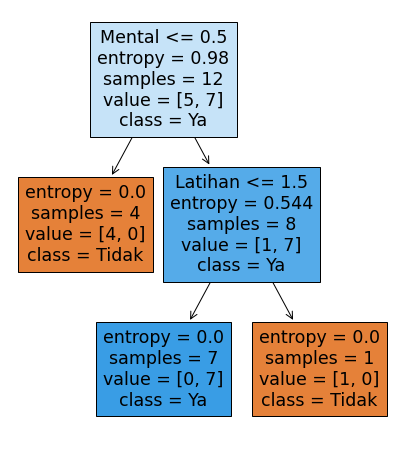

In [10]:
tree_dataset = DecisionTreeClassifier(criterion='entropy')
tree_dataset.fit(atr_dataset, cls_dataset)
plt.figure(figsize=(7,8))
plot_tree(tree_dataset, feature_names=xtest.columns, class_names=['Tidak', 'Ya'], filled=True)
plt.show()